# Basic examples of usage of GeoImage, GeoImageTilers

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os 

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from GeoImage import GeoImage
from GeoImageTilers import GeoImageTiler, GeoImageTilerConstSize
from create_synthetic_images import create

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def display(img, **kwargs):
    plt.imshow(img[:,:,:3], interpolation='none', **kwargs)
    plt.colorbar(orientation='horizontal')

## GeoImage examples

### Open image with GeoImage and print basic information

- Image shape
- geo projection string 
- geographic extent in WGS84
- metadata
- some other functions from gdal dataset

In [4]:
gimg = GeoImage('dog.jpg')

gimg.shape, gimg.projection, gimg.geo_extent, gimg.metadata, gimg.get_dataset().GetDescription(), gimg.get_dataset().GetGeoTransform()

((576, 768, 3),
 '',
 None,
 {'BAND_1__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'BAND_2__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'BAND_3__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'COLOR_PROFILE__SOURCE_ICC_PROFILE': 'AAAMSExpbm8CEAAAbW50clJHQiBYWVogB84AAgAJAAYAMQAAYWNzcE1TRlQAAAAASUVDIHNSR0IAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1IUCAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARY3BydAAAAVAAAAAzZGVzYwAAAYQAAABsd3RwdAAAAfAAAAAUYmtwdAAAAgQAAAAUclhZWgAAAhgAAAAUZ1hZWgAAAiwAAAAUYlhZWgAAAkAAAAAUZG1uZAAAAlQAAABwZG1kZAAAAsQAAACIdnVlZAAAA0wAAACGdmlldwAAA9QAAAAkbHVtaQAAA/gAAAAUbWVhcwAABAwAAAAkdGVjaAAABDAAAAAMclRSQwAABDwAAAgMZ1RSQwAABDwAAAgMYlRSQwAABDwAAAgMdGV4dAAAAABDb3B5cmlnaHQgKGMpIDE5OTggSGV3bGV0dC1QYWNrYXJkIENvbXBhbnkAAGRlc2MAAAAAAAAAEnNSR0IgSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAAC

### Get image data
- Whole image
- Part of the image without rescaling
- Part of the image with rescaling

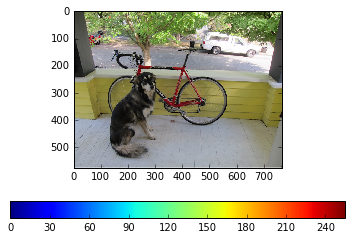

In [5]:
np_img = gimg.get_data(dtype=np.uint8)
np_img.dtype, np_img.shape
display(np_img)

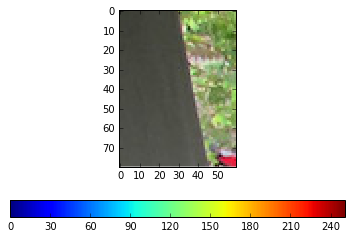

In [40]:
display(gimg.get_data([10, 15, 60, 80], dtype=np.uint8))

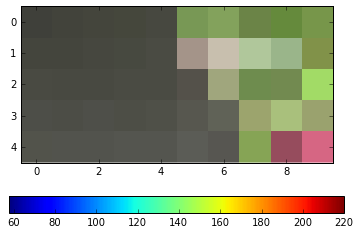

In [41]:
display(gimg.get_data([10, 15, 60, 80], dst_width=10, dst_height=5, dtype=np.uint8))

## GeoImageTilers examples

### GeoImageTiler : iterator over tiles of GeoImage

1. Add `nodata` values, constant tile size and overlapping

(256, 256, 3) int64 0 255 -15 -15
(256, 256, 3) int64 0 255 226 -15
(256, 256, 3) int64 0 255 467 -15
(256, 256, 3) int64 0 255 708 -15
(256, 256, 3) int64 0 221 -15 226
(256, 256, 3) int64 0 232 226 226
(256, 256, 3) int64 0 241 467 226
(256, 256, 3) int64 0 241 708 226
(256, 256, 3) int64 0 201 -15 467
(256, 256, 3) int64 0 195 226 467
(256, 256, 3) int64 0 194 467 467
(256, 256, 3) int64 0 156 708 467


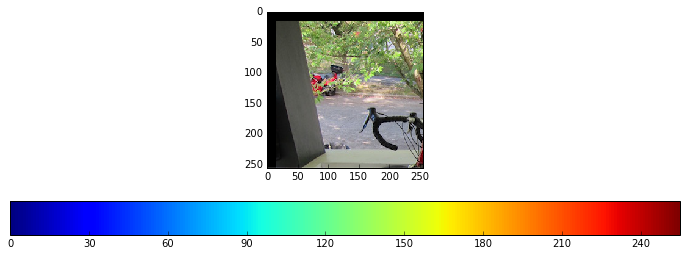

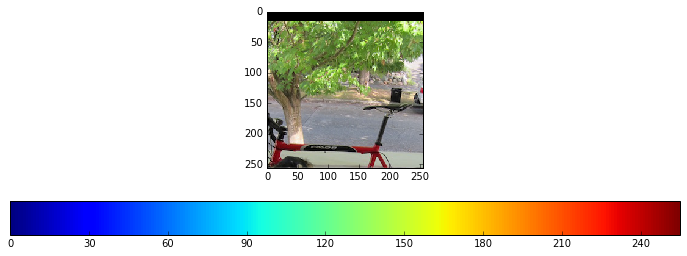

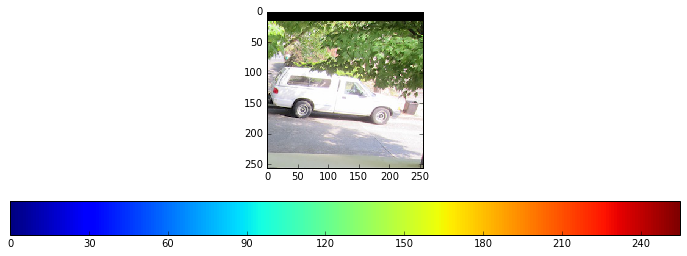

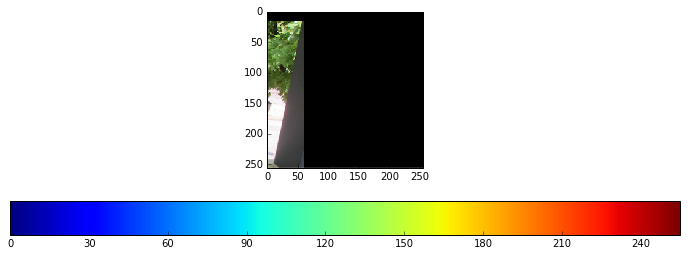

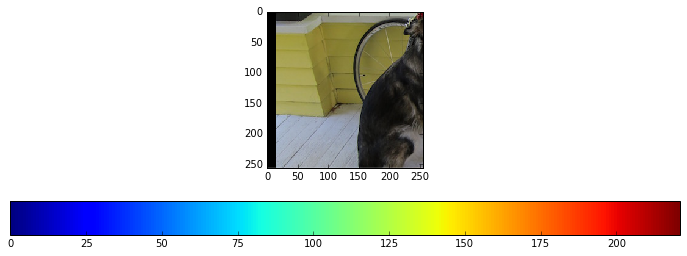

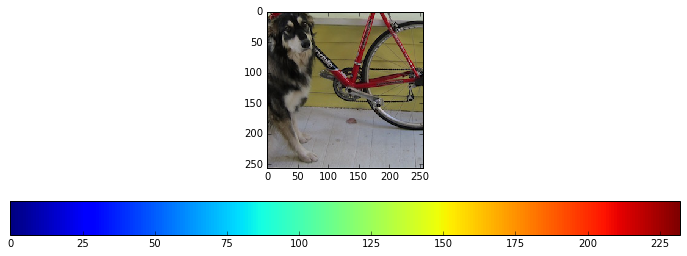

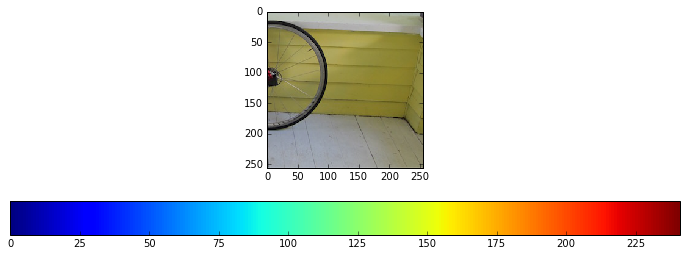

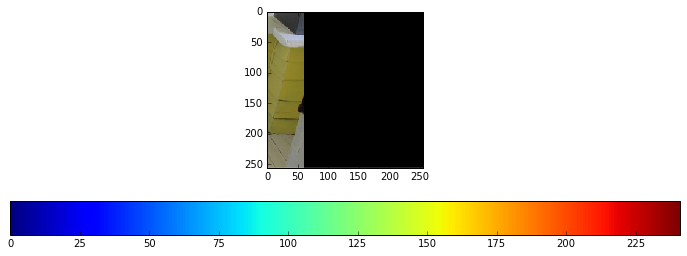

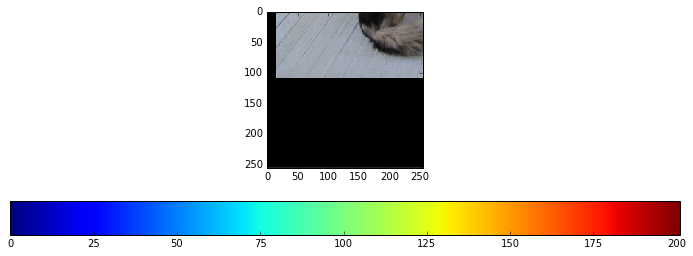

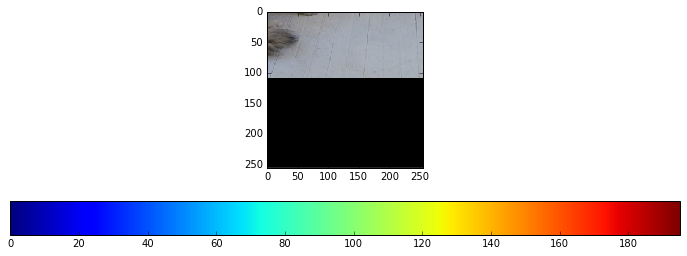

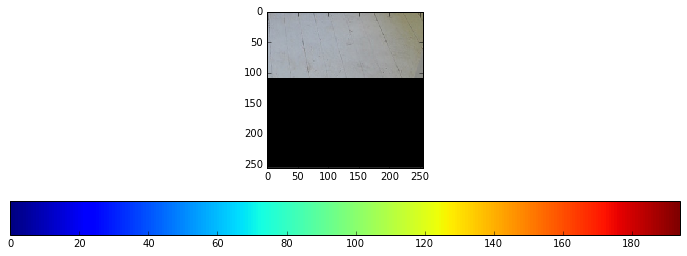

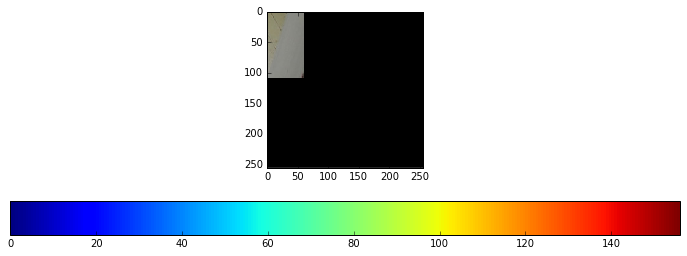

In [42]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=15, include_nodata=True, nodata_value=0)

for tile, xoffset, yoffset in tiles:
    print tile.shape, tile.dtype, tile.min(), tile.max(), xoffset, yoffset
    plt.figure(figsize=(12,4))
    display(tile.astype(np.uint8))

(241, 241, 3) float64 0.0 255.0 0 0
(241, 256, 3) float64 0.0 255.0 226 0
(241, 256, 3) float64 0.0 255.0 467 0
(241, 60, 3) float64 0.0 255.0 708 0
(256, 241, 3) float64 0.0 221.0 0 226
(256, 256, 3) float64 0.0 232.0 226 226
(256, 256, 3) float64 0.0 241.0 467 226
(256, 60, 3) float64 0.0 241.0 708 226
(109, 241, 3) float64 0.0 201.0 0 467
(109, 256, 3) float64 29.0 195.0 226 467
(109, 256, 3) float64 65.0 194.0 467 467
(109, 60, 3) float64 33.0 156.0 708 467


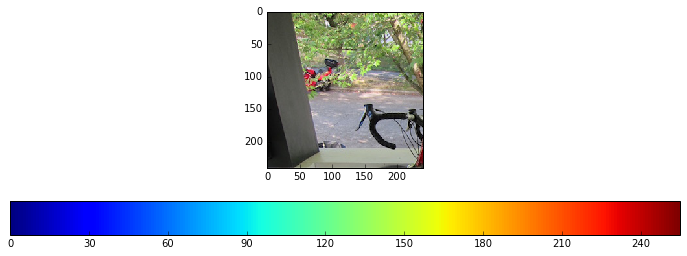

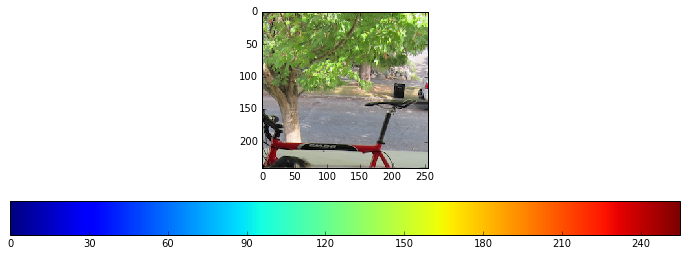

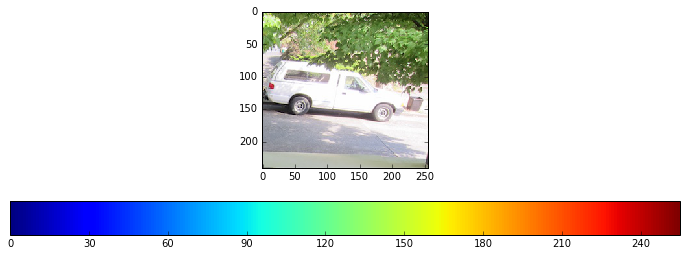

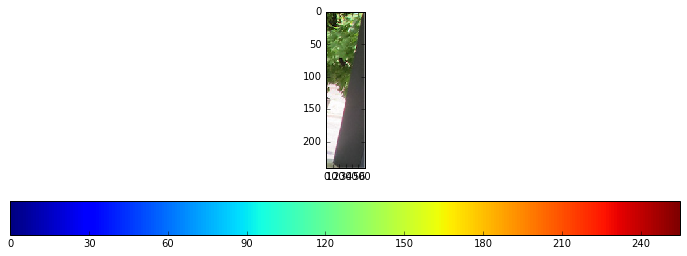

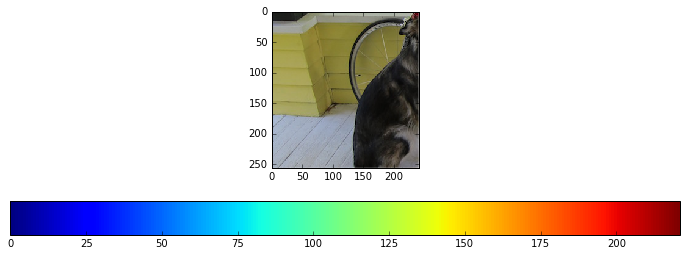

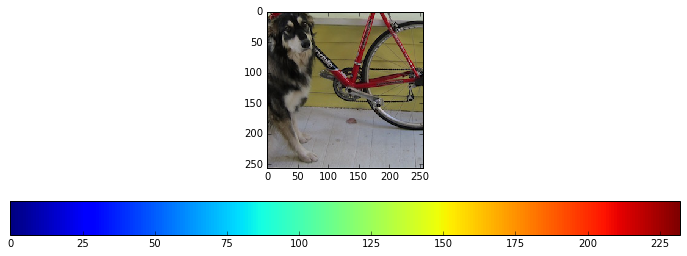

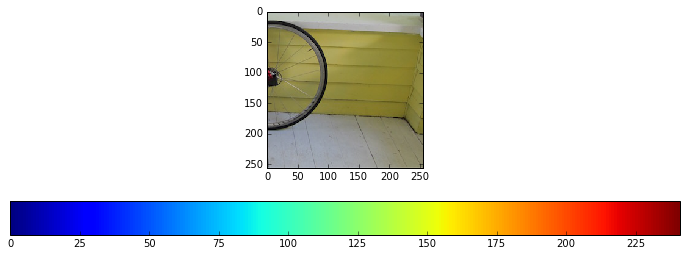

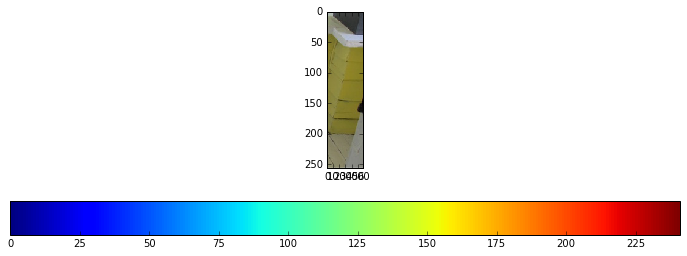

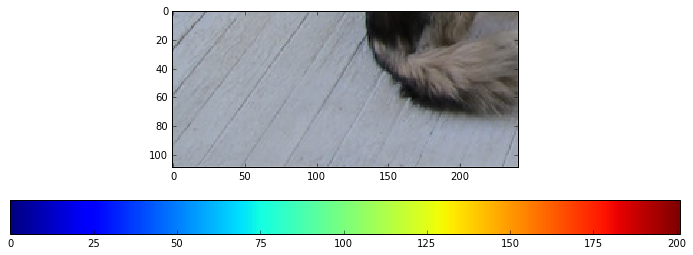

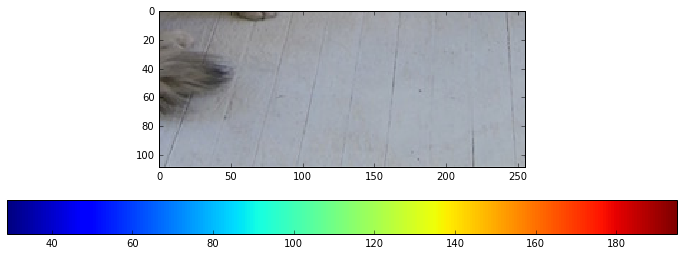

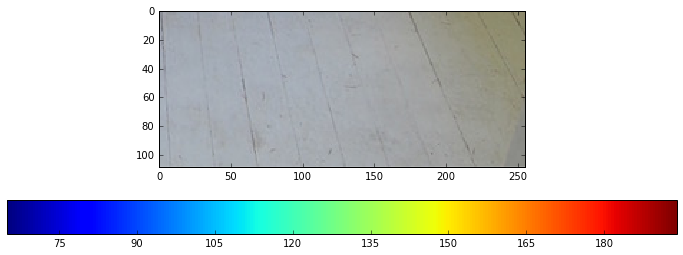

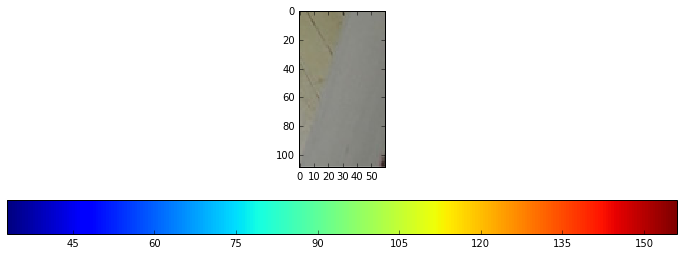

In [19]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=15, include_nodata=False, nodata_value=-1.0)
for tile, xoffset, yoffset in tiles:
    print tile.shape, tile.dtype, tile.min(), tile.max(), xoffset, yoffset
    plt.figure(figsize=(12,4))
    display(tile.astype(np.uint8))

(256, 256, 3) 0.0 0.0
(256, 256, 3) 217.6 0.0
(256, 256, 3) 435.2 0.0
(256, 136, 3) 652.8 0.0
(256, 256, 3) 0.0 217.6
(256, 256, 3) 217.6 217.6
(256, 256, 3) 435.2 217.6
(256, 136, 3) 652.8 217.6
(166, 256, 3) 0.0 435.2
(166, 256, 3) 217.6 435.2
(166, 256, 3) 435.2 435.2
(166, 136, 3) 652.8 435.2


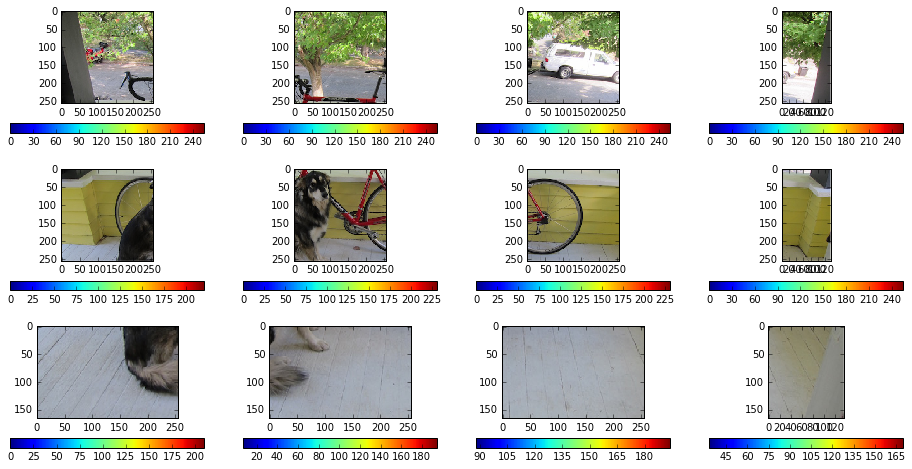

In [70]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=0, include_nodata=False, scale=0.85, nodata_value=0.0)
plt.figure(figsize=(16,8))
c = 1
for tile, xoffset, yoffset in tiles:
    print tile.shape, xoffset, yoffset
    plt.subplot(3,4,c); c+=1
    display(tile.astype(np.uint8))

In [8]:
def _f(_x):
    return int(np.ceil(_x))


tiled_image.shape: (466, 621, 3)
x * 1.0 / scale :  0.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  128.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  256.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  384.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  512.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  0.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  128.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  256.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  384.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  512.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  0.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  128.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  256.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  384.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  512.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  0.0
y * 1.0 / scale :  384.0
x * 1.0 / scale :  128.0
y * 1.0 / scale :  384.0
x * 1.0 / scale :  256.0
y * 1.0 / scale :  384.0
x * 1.0 / scale :  384.0
y * 1.0 / scale :  384.0
x * 1.0 / scale :  512.0
y * 1.0 / 

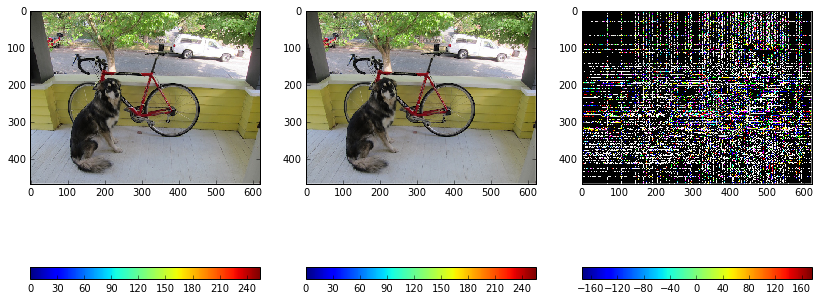

In [73]:
tile_size = (128, 128)
overlapping = 0
scale = 1.238

def _f(_x):
    return int(np.ceil(_x))

def _f2(_x):
    return int(np.floor(_x))


# Total tiled image is smaller if scale > 1
h, w, nc = gimg.shape
h = _f(h * 1.0 / scale)
w = _f(w * 1.0 / scale)
tiled_image = np.zeros((h, w, nc))
print "tiled_image.shape:", tiled_image.shape
tiles = GeoImageTiler(gimg, tile_size=tile_size,
                      overlapping=overlapping,
                      include_nodata=False, scale=scale)
for tile, x, y in tiles:
    # Offset is given for the original image
    print "x * 1.0 / scale : ", x * 1.0 / scale
    print "y * 1.0 / scale : ", y * 1.0 / scale
    x = _f2(x * 1.0 / scale)
    y = _f2(y * 1.0 / scale)
    xend = min(x+tile_size[0], w)
    yend = min(y+tile_size[1], h)
    if tile.shape[:2] != (yend-y, xend-x):
        print x,xend, y,yend, tile.shape, (yend-y, xend-x)

    tiled_image[y:yend, x:xend, :] = tile

scaled_img = gimg.get_data(dst_height=h, dst_width=w)

fig = plt.figure(figsize=(14,10))
fig.add_subplot(131)
display(scaled_img.astype(np.uint8))
fig.add_subplot(132)
display(tiled_image.astype(np.uint8))
fig.add_subplot(133)
display(scaled_img - tiled_image)
err = float(np.sum(tiled_image - scaled_img))
print err
# logging.debug("Err : %f" % err)
# self.assertTrue(np.abs(err) < 1e-10)

In [16]:
tiled_image.shape, tiled_image.min(), tiled_image.max()

((80, 67, 5), 0.0, 254.0)

In [17]:
scaled_img.shape, scaled_img.min(), scaled_img.max()

((80, 67, 5), 0, 254)

In [55]:
10. / 1.234


8.103727714748784

In [56]:
3 * 1.234

3.702

In [75]:
_ = create(10, 11, 1, 'test_image.tif', depth=1)

In [6]:
from GeoImage import from_ndarray

In [9]:
gimg2 = GeoImage('test_image.tif')
data = gimg2.get_data()
h, w, nc = gimg2.shape
scale = 1.234
h2 = _f(h * 1.0 / scale)
w2 = _f(w * 1.0 / scale)
data2 = gimg2.get_data(dst_height=h2, dst_width=w2)
print data[:,:,0]
print data2[:,:,0], h2, w2, h, w 

[[132 104 181 224  15  23 195 211  58  52]
 [ 17  94 147  35  30  83  91 199 176  71]
 [141 204  61   4 215 161 100 106  33  48]
 [224  43 125 242 176 178 195  14  28 254]
 [ 30 154 196 150  67 217 144 233 128 231]
 [142   8  63  94 129 149 157  96  22  48]
 [ 66   1 244 136 162 133 247 203  83  86]
 [186  97 106  44  60 239 207 121 210  85]
 [192  89  15 107 146  99 148 198 161 176]
 [ 79 188  31  55  34 184 107  67 227   3]
 [ 53 146 208 189 197  18 143  72   8  16]]
[[132 104 181 224  23 195 211  58  52]
 [ 17  94 147  35  83  91 199 176  71]
 [224  43 125 242 178 195  14  28 254]
 [ 30 154 196 150 217 144 233 128 231]
 [142   8  63  94 149 157  96  22  48]
 [ 66   1 244 136 133 247 203  83  86]
 [186  97 106  44 239 207 121 210  85]
 [ 79 188  31  55 184 107  67 227   3]
 [ 53 146 208 189  18 143  72   8  16]] 9 9 11 10


In [10]:
gimg3 = from_ndarray(data2)

In [11]:
tiles = GeoImageTiler(gimg2, tile_size=(3,3), overlapping=0, scale=1.234)
tiles2 = GeoImageTiler(gimg3, tile_size=(3,3), overlapping=0)
for (tile, x, y), (tile2, x2, y2)  in zip(tiles, tiles2):
    print "\n--"
    print tile[:,:,0], x, y
    print tile2[:,:,0], x2, y2


--
[[132 104 224]
 [ 17  94  35]
 [224  43 242]] 0.0 0.0
[[132 104 181]
 [ 17  94 147]
 [224  43 125]] 0.0 0.0

--
[[ 15  23 195]
 [ 30  83  91]
 [176 178 195]] 3.702 0.0
[[224  23 195]
 [ 35  83  91]
 [242 178 195]] 3.0 0.0

--
[[ 58  52]
 [176  71]
 [ 28 254]] 7.404 0.0
[[211  58  52]
 [199 176  71]
 [ 14  28 254]] 6.0 0.0

--
[[ 30 154 150]
 [142   8  94]
 [ 66   1 136]] 0.0 3.702
[[ 30 154 196]
 [142   8  63]
 [ 66   1 244]] 0.0 3.0

--
[[ 67 217 144]
 [129 149 157]
 [162 133 247]] 3.702 3.702
[[150 217 144]
 [ 94 149 157]
 [136 133 247]] 3.0 3.0

--
[[128 231]
 [ 22  48]
 [ 83  86]] 7.404 3.702
[[233 128 231]
 [ 96  22  48]
 [203  83  86]] 6.0 3.0

--
[[192  89 107]
 [ 53 146 189]] 0.0 7.404
[[186  97 106]
 [ 79 188  31]
 [ 53 146 208]] 0.0 6.0

--
[[146  99 148]
 [197  18 143]] 3.702 7.404
[[ 44 239 207]
 [ 55 184 107]
 [189  18 143]] 3.0 6.0

--
[[161 176]
 [  8  16]] 7.404 7.404
[[121 210  85]
 [ 67 227   3]
 [ 72   8  16]] 6.0 6.0


In [53]:
dtype = np.uint8
for dtype in [np.uint8, np.uint16, np.int, np.float32, np.complex64, np.int16]:
    print "Dtype : ", dtype
    for v in [-1.0, 0.0, -1, 0, 256, 123456, -123456, -123]:
        print v, np.array([v]).astype(dtype) == np.array([v])
    

Dtype :  <type 'numpy.uint8'>
-1.0 [False]
0.0 [ True]
-1 [False]
0 [ True]
256 [False]
123456 [False]
-123456 [False]
-123 [False]
Dtype :  <type 'numpy.uint16'>
-1.0 [False]
0.0 [ True]
-1 [False]
0 [ True]
256 [ True]
123456 [False]
-123456 [False]
-123 [False]
Dtype :  <type 'int'>
-1.0 [ True]
0.0 [ True]
-1 [ True]
0 [ True]
256 [ True]
123456 [ True]
-123456 [ True]
-123 [ True]
Dtype :  <type 'numpy.float32'>
-1.0 [ True]
0.0 [ True]
-1 [ True]
0 [ True]
256 [ True]
123456 [ True]
-123456 [ True]
-123 [ True]
Dtype :  <type 'numpy.complex64'>
-1.0 [ True]
0.0 [ True]
-1 [ True]
0 [ True]
256 [ True]
123456 [ True]
-123456 [ True]
-123 [ True]
Dtype :  <type 'numpy.int16'>
-1.0 [ True]
0.0 [ True]
-1 [ True]
0 [ True]
256 [ True]
123456 [False]
-123456 [False]
-123 [ True]
